<a href="https://colab.research.google.com/github/Groupac/Collab/blob/master/3%20%D0%98%D0%A1%20%D0%90%D1%87%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%20%D0%90%D0%BB%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving user_dataset.csv to user_dataset.csv


[68  8 43 ... 32  3 19]
[ 1.  4.  0. ...  0.  6. 17.]


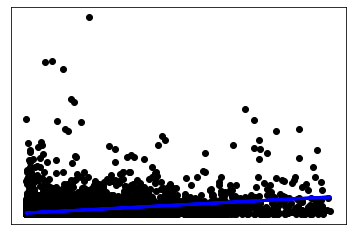

In [23]:
import io 
import pandas as pd 
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

data = pd.read_csv(io.BytesIO(uploaded['user_dataset.csv']))# Dataset is now stored in a Pandas Dataframe
length = 14675
x = data.comments.values
y = data.karma.values
print (x)
print (y)
x = x.reshape(length, 1)
y = y.reshape(length, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()